Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            900 non-null    datetime64[ns]
 1   customer_id     900 non-null    object        
 2   location        900 non-null    object        
 3   product         900 non-null    object        
 4   category        900 non-null    object        
 5   units_sold      900 non-null    int64         
 6   unit_price      900 non-null    float64       
 7   payment_method  900 non-null    object        
 8   total_sales     900 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 63.4+ KB
None
                                date  units_sold  unit_price   total_sales
count                            900  900.000000  900.000000    900.000000
mean   2025-05-06 23:34:46.302294528   49.606667  106.629621 

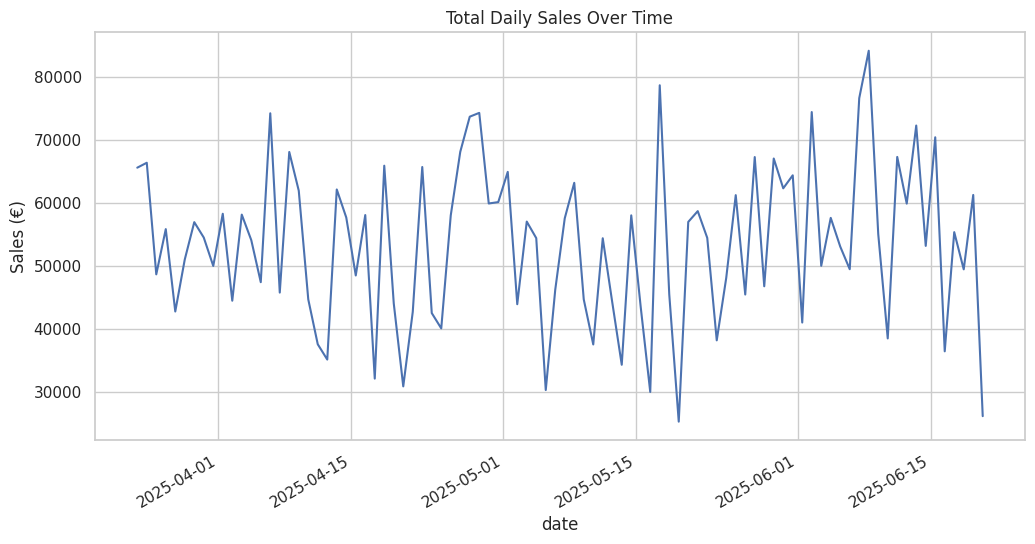

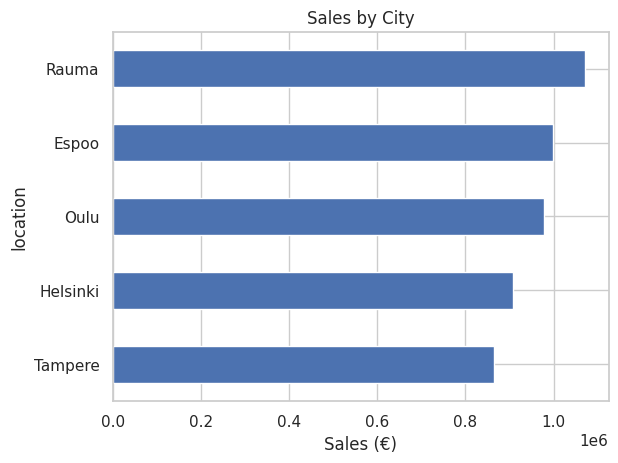

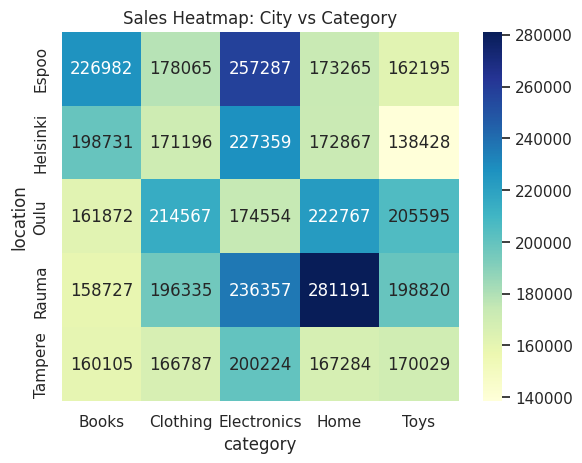

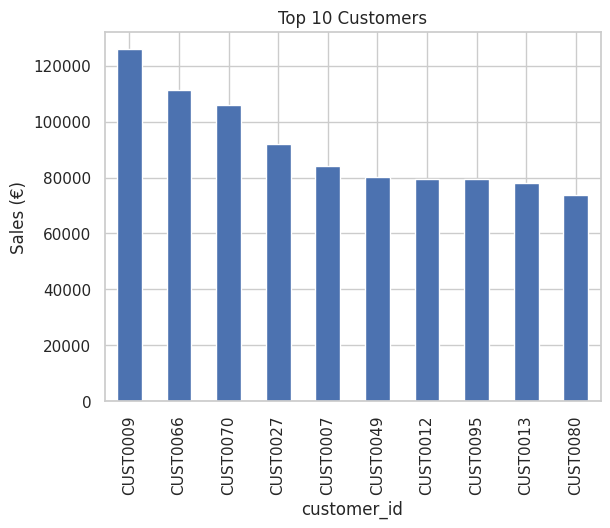

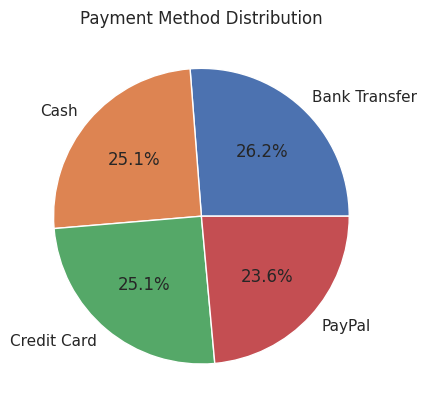

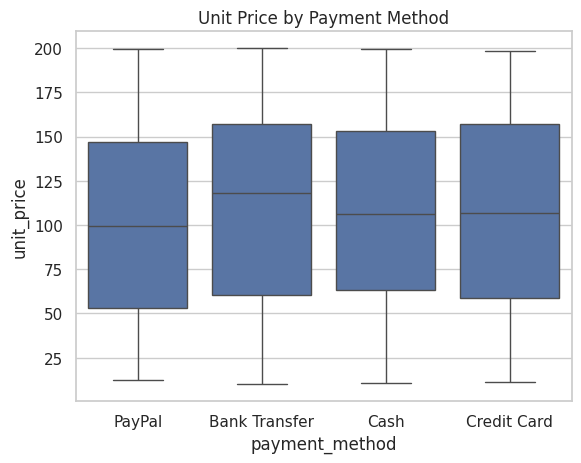

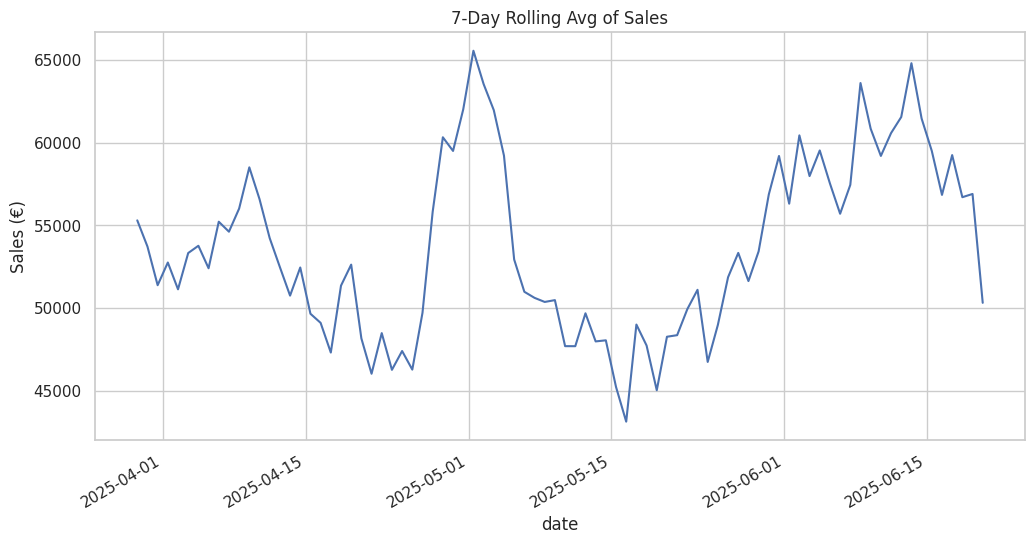

In [ ]:
#  Advanced Sales Data Analysis – Portfolio Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Load Data
df = pd.read_csv("complex_sales_data.csv")
df['date'] = pd.to_datetime(df['date'])

# Overview
print(df.info())
print(df.describe())

# Total Daily Sales
daily_sales = df.groupby('date')['total_sales'].sum()
daily_sales.plot(figsize=(12,6), title="Total Daily Sales Over Time")
plt.ylabel("Sales (€)")
plt.show()

# Sales by City
df.groupby('location')['total_sales'].sum().sort_values().plot(kind="barh", title="Sales by City")
plt.xlabel("Sales (€)")
plt.show()

# Heatmap City vs Category
pivot = df.pivot_table(index='location', columns='category', values='total_sales', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap: City vs Category")
plt.show()

# Top Customers
df.groupby('customer_id')['total_sales'].sum().sort_values(ascending=False).head(10).plot(kind="bar", title="Top 10 Customers")
plt.ylabel("Sales (€)")
plt.show()

# Payment Methods
df['payment_method'].value_counts().plot.pie(autopct='%1.1f%%', title="Payment Method Distribution")
plt.ylabel("")
plt.show()

# Boxplot Price vs Payment
sns.boxplot(data=df, x='payment_method', y='unit_price')
plt.title("Unit Price by Payment Method")
plt.show()

# Rolling Sales Average
df_sorted = df.sort_values('date')
rolling_sales = df_sorted.groupby('date')['total_sales'].sum().rolling(window=7).mean()
rolling_sales.plot(figsize=(12,6), title="7-Day Rolling Avg of Sales")
plt.ylabel("Sales (€)")
plt.show()